In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook
%matplotlib inline

In [ ]:
Cleaned_Data = pd.read_pickle('Cleaned_Method_Wise_Data/RandomForestClassifier_cleaned.tsv.gz')
Cleaned_Data.head()

In [ ]:
Cleaned_Data.shape

In [23]:
Cleaned_Data['criterion_bitwise'] = Cleaned_Data.criterion.map({'gini':0, 'entropy':1})
Cleaned_Data['warm_start_bitwise'] = Cleaned_Data.warm_start.map({'True':1, 'False':0})
Cleaned_Data.head()

,Dataset_Name,Method_Name,Test_Score,n_estimators,max_depth,max_features,criterion,warm_start,criterion_bitwise,warm_start_bitwise
0,soybean,RandomForestClassifier,0.936047,10,50,0.25,gini,True,0,1
1,soybean,RandomForestClassifier,0.930233,10,50,0.25,gini,True,0,1
2,soybean,RandomForestClassifier,0.941860,10,50,0.25,gini,True,0,1
3,soybean,RandomForestClassifier,0.959302,10,50,0.25,gini,True,0,1
4,soybean,RandomForestClassifier,0.912791,10,50,0.25,gini,True,0,1


In [ ]:
# Trial to work on problematic max_features

max_features_list=Cleaned_Data['max_features'].unique().tolist()
max_features_list
Max_features = ["0.25","0.5","0.1","sqrt","0.75", "log2"]
Cleaned_Data.plot(kind='scatter', x='Max_features', y='Test_Score')
#Cleaned_Data['warm_start'] = Cleaned_Data['warm_start'].astype(float)

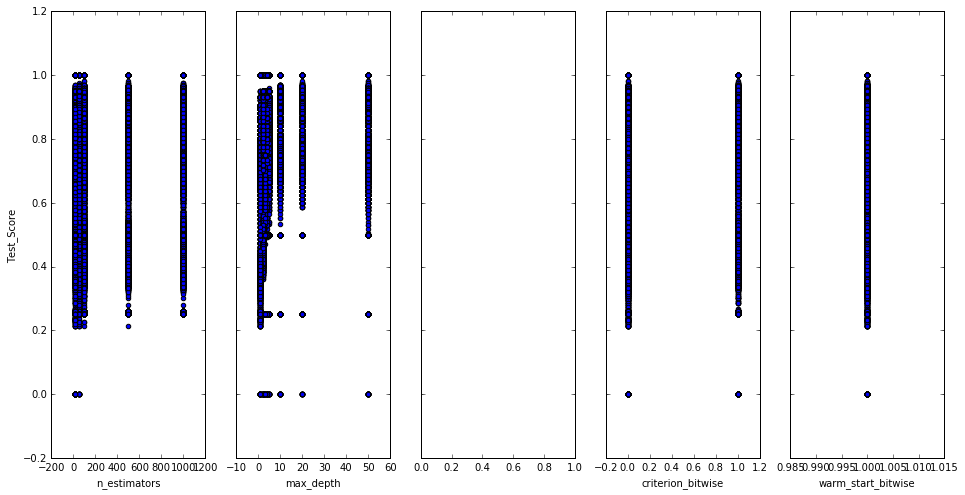

In [26]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, sharey=True)
Cleaned_Data.plot(kind='scatter', x='n_estimators', y='Test_Score', ax=axs[0], figsize=(16, 8))
Cleaned_Data.plot(kind='scatter', x='max_depth', y='Test_Score', ax=axs[1])
#Cleaned_Data.plot(kind='scatter', x='max_features', y='Test_Score', ax=axs[2])
Cleaned_Data.plot(kind='scatter', x='criterion_bitwise', y='Test_Score', ax=axs[3])
Cleaned_Data.plot(kind='scatter', x='warm_start_bitwise', y='Test_Score', ax=axs[4])

In [ ]:
# Doubt why does the below not work?

In [ ]:


import seaborn as sb

plt.figure()
sb.jointplot(Data=Cleaned_Data, kind='reg', x='n_estimators', y='Test_Score')

plt.figure()
sb.jointplot(Data=Cleaned_Data, kind='reg', x='max_depth', y='Test_Score')

#plt.figure()
#sb.jointplot(Data=Cleaned_Data, kind='reg', x='max_features', y='Test_Score')

#plt.figure()
#sb.jointplot(Data=Cleaned_Data, kind='reg', x='max_depth', y='Test_Score')

#plt.figure()
#sb.jointplot(Data=Cleaned_Data, kind='reg', x='max_depth', y='Test_Score')

In [47]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
ne = smf.ols(formula='Test_Score ~ n_estimators', data=Cleaned_Data).fit()
md = smf.ols(formula='Test_Score ~ max_depth', data=Cleaned_Data).fit()
mf = smf.ols(formula='Test_Score ~ max_features', data=Cleaned_Data).fit()
#cbc = smf.ols(formula='Test_Score ~ criterion_bitwise', data=Cleaned_Data).fit()
#ws = smf.ols(formula='Test_Score ~ warm_start', data=Cleaned_Data).fit()

# print the coefficients
#ne.params
#md.params
mf.params
#cbc.params
#ws.params

Intercept            0.776950
criterion_bitwise    0.002131
dtype: float64

In [48]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
#X_new = pd.DataFrame({'learning_rate': [0.01]})
X_new_ne = pd.DataFrame({'n_estimators': [500]})
#X_new.head()
X_new_ne.head()

,n_estimators
0,500


In [49]:
# use the model to make predictions on a new value
#lr.predict(X_new)
ne.predict(X_new_ne)

array([ 0.77991867])

In [51]:
# create a DataFrame with the minimum and maximum values of TV
#X_new = pd.DataFrame({'learning_rate': [data.learning_rate.min(), data.learning_rate.max()]})
#X_new.head()
X_new_ne = pd.DataFrame({'n_estimators': [Cleaned_Data.n_estimators.min(), Cleaned_Data.n_estimators.max()]})
X_new_ne.head()

,n_estimators
0,10
1,1000


In [52]:
# make predictions for those x values and store them
#preds = lm.predict(X_new)
#preds
preds = ne.predict(X_new_ne)
preds

array([ 0.77441506,  0.78553459])

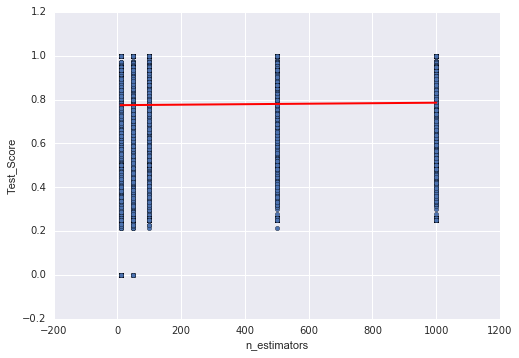

In [53]:
# first, plot the observed data
#data.plot(kind='scatter', x='learning_rate', y='Test_Score')

# then, plot the least squares line
#plt.plot(X_new, preds, c='red', linewidth=2)

# first, plot the observed data
Cleaned_Data.plot(kind='scatter', x='n_estimators', y='Test_Score')

# then, plot the least squares line
plt.plot(X_new_ne, preds, c='red', linewidth=2)

In [54]:
# print the confidence intervals for the model coefficients
#lr.conf_int()
# print the confidence intervals for the model coefficients
ne.conf_int()

,0,1
Intercept,0.773421,0.775185
n_estimators,0.000009,0.000013


In [55]:
# print the p-values for the model coefficients
#lr.pvalues
# print the p-values for the model coefficients
ne.pvalues

Intercept       0.000000e+00
n_estimators    6.553962e-36
dtype: float64

In [56]:
# print the R-squared value for the model
#lr.rsquared
# print the R-squared value for the model
ne.rsquared

0.00067607592403196026

In [59]:
# create a fitted model with all two features
lm = smf.ols(formula='Test_Score ~ n_estimators + max_depth + criterion + warm_start ', data=Cleaned_Data).fit()

# print the coefficients
lm.params

Intercept            0.761424
criterion[T.gini]   -0.002103
n_estimators         0.000011
max_depth            0.001170
dtype: float64

In [60]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1031.
Date:                Tue, 15 Mar 2016   Prob (F-statistic):               0.00
Time:                        02:54:48   Log-Likelihood:                 93196.
No. Observations:              231420   AIC:                        -1.864e+05
Df Residuals:                  231416   BIC:                        -1.863e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.7614      0.001   1236.126      0.000         0.760     0.763
criterion[T.gini]    -0.0021      0.001     -3.127      0.002        -0.003    -0.001
n_estimators       1.128e-05   8.92e-07     12.651      0.000      9.54e-06   1.3e-05
max_depth             0.0012   2.16e-05     54.071      0.000         0.001     0.001
==============================================================================
Omnibus:                    20691.627   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26665.309
Skew:                          -0.808   Prob(JB):                         0.00
Kurtosis:                       3.390   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Closely related to confidence intervals is hypothesis testing. We start with a null hypothesis and an alternative hypothesis (that is opposite the null). Then, we check whether the data supports rejecting the null hypothesis or failing to reject the null hypothesis.

(Also "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
Null hypothesis: There is no relationship between Test Score and the predictor variables (and thus β's equals zero)
Alternative hypothesis: There is a relationship between TV ads and Sales (and thus β1 is not equal to zero)

Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero.

In [61]:
Cleaned_Data

,Dataset_Name,Method_Name,Test_Score,n_estimators,max_depth,max_features,criterion,warm_start,criterion_bitwise,warm_start_bitwise
0,soybean,RandomForestClassifier,0.936047,10,50,0.25,gini,True,0,1
1,soybean,RandomForestClassifier,0.930233,10,50,0.25,gini,True,0,1
2,soybean,RandomForestClassifier,0.941860,10,50,0.25,gini,True,0,1
3,soybean,RandomForestClassifier,0.959302,10,50,0.25,gini,True,0,1
4,soybean,RandomForestClassifier,0.912791,10,50,0.25,gini,True,0,1
5,soybean,RandomForestClassifier,0.918605,10,50,0.25,gini,True,0,1
6,soybean,RandomForestClassifier,0.953488,10,50,0.25,gini,True,0,1
7,soybean,RandomForestClassifier,0.918605,10,50,0.25,gini,True,0,1
8,soybean,RandomForestClassifier,0.918605,10,50,0.25,gini,True,0,1
9,soybean,RandomForestClassifier,0.918605,10,50,0.25,gini,True,0,1


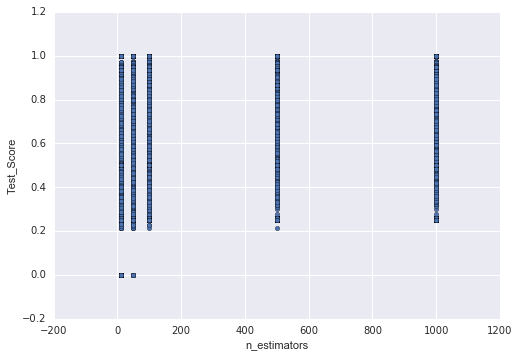

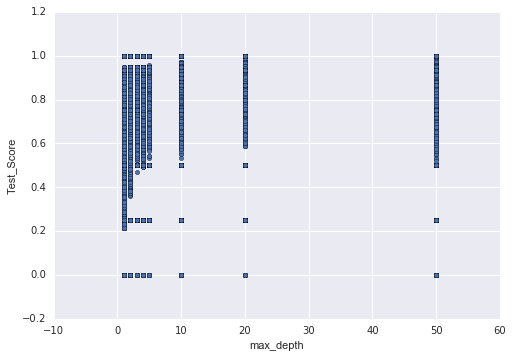

In [64]:
Cleaned_Data.plot(kind='scatter', x='n_estimators', y='Test_Score')
Cleaned_Data.plot(kind='scatter', x='max_depth', y='Test_Score')